In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
data = pd.read_csv('IRIS.csv')

In [3]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [5]:
# Encode the target labels (species) into numerical values
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])


In [6]:
# Split the dataset into features and target variable
X = data.drop(columns=['species'])
y = data['species']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [10]:
# Calculate accuracy and display metrics
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the model:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


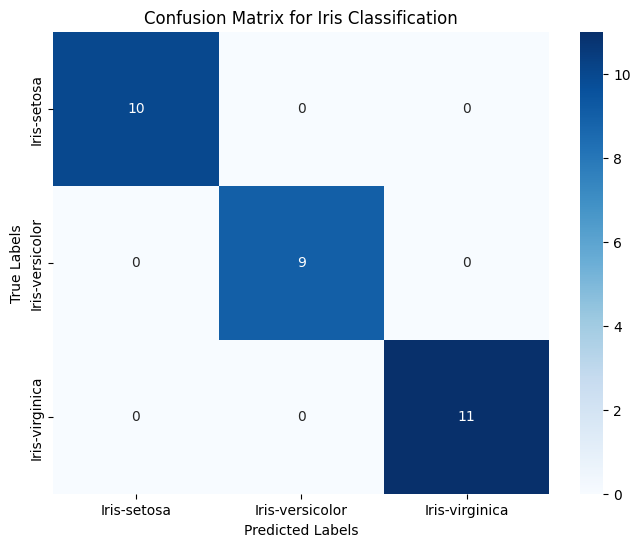

In [11]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Iris Classification")
plt.show()

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# 1. Display a statistical summary of the dataset
print("Statistical Summary of Dataset:")
print(data.describe())


Statistical Summary of Dataset:
       sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


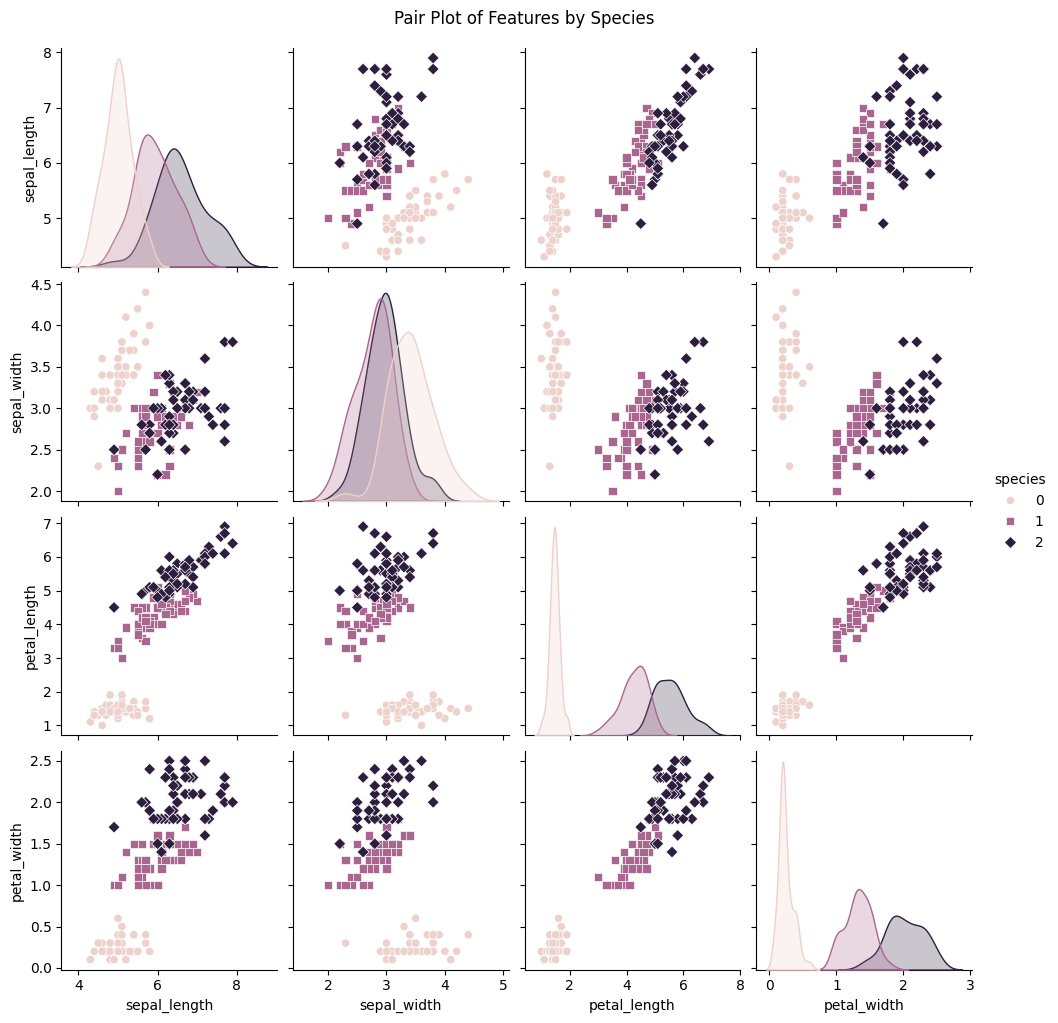

In [14]:
# 2. Data Visualization

# Pair plot to see the relationships between features and species
sns.pairplot(data, hue="species", markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Features by Species", y=1.02)
plt.show()

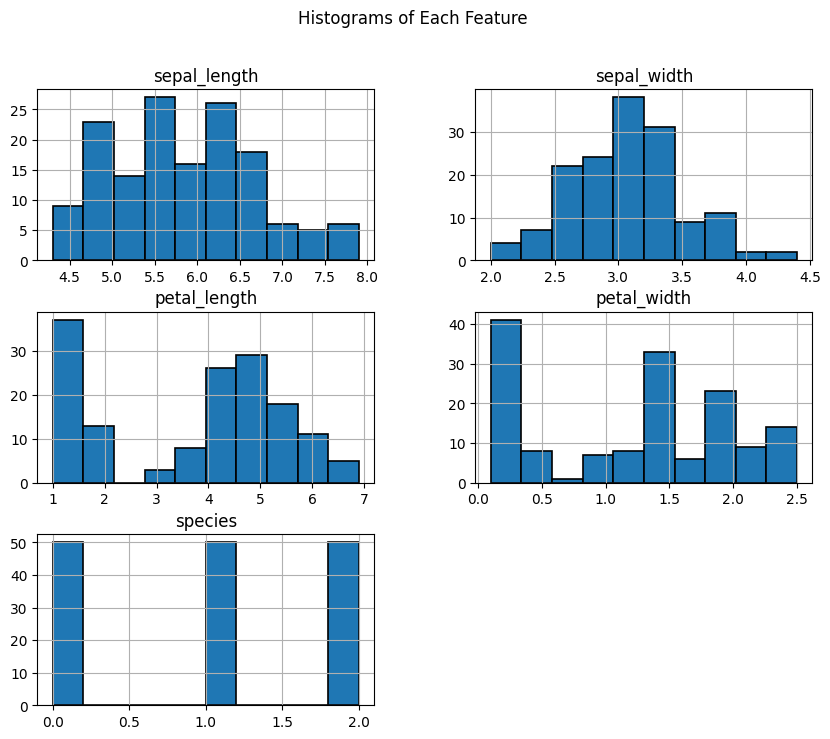

In [15]:
# Histograms for each feature
data.hist(edgecolor="black", linewidth=1.2, figsize=(10, 8))
plt.suptitle("Histograms of Each Feature")
plt.show()

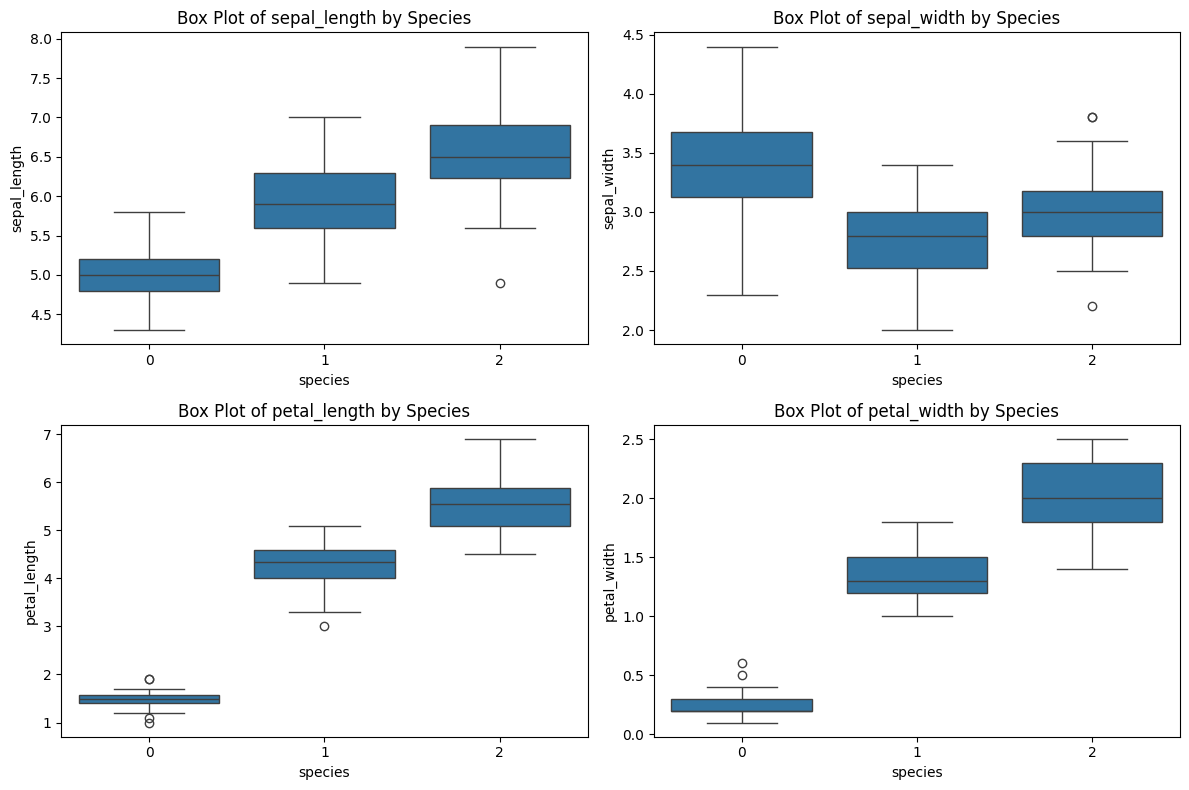

In [16]:
# Box plots to see feature distributions and spot outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="species", y=column, data=data)
    plt.title(f"Box Plot of {column} by Species")
plt.tight_layout()
plt.show()

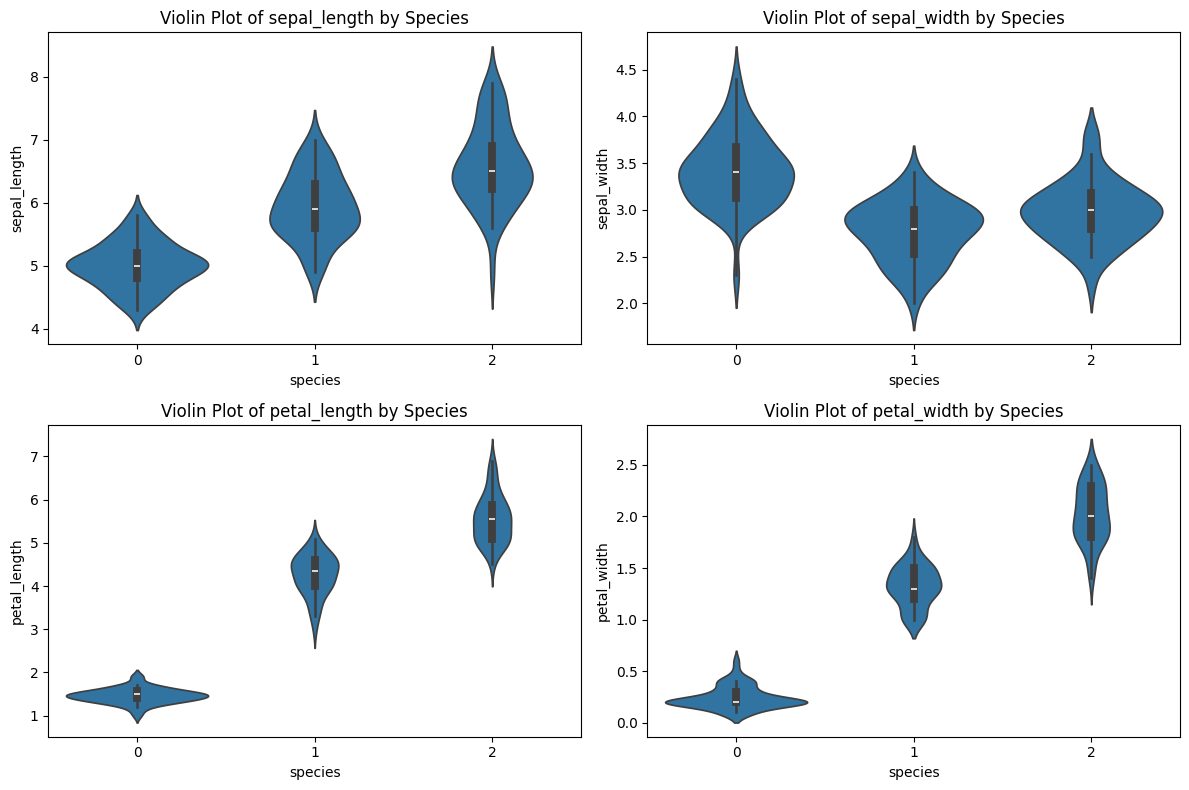

In [17]:
# Violin plots to visualize the distribution and density of each feature by species
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x="species", y=column, data=data)
    plt.title(f"Violin Plot of {column} by Species")
plt.tight_layout()
plt.show()

In [18]:
# 3. Correlation Matrix and Heatmap
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000    -0.109369      0.871754     0.817954  0.782561
sepal_width      -0.109369     1.000000     -0.420516    -0.356544 -0.419446
petal_length      0.871754    -0.420516      1.000000     0.962757  0.949043
petal_width       0.817954    -0.356544      0.962757     1.000000  0.956464
species           0.782561    -0.419446      0.949043     0.956464  1.000000


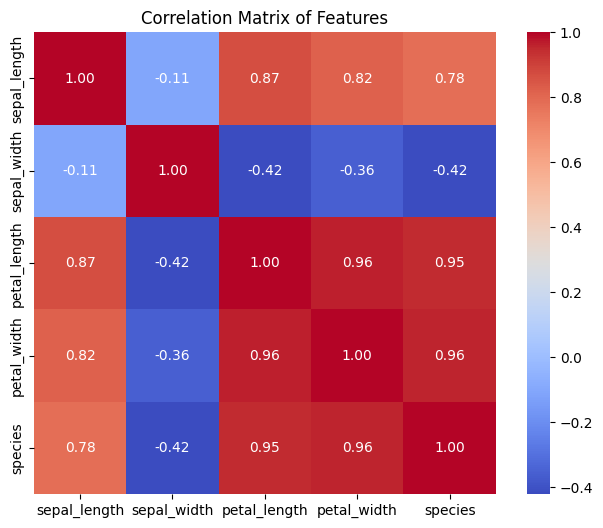

In [19]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()